# Figures

## SODA

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
from fastjmd95 import jmd95numba
import json

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
wmt_budget_terms = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/wmt_budget_terms/wmt_budget_terms.zarr'))
wmt_budget_terms#.load()

/tmp/ipykernel_329/2652194385.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  wmt_budget_terms = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SODA/datasets/wmt_budget_terms/wmt_budget_terms.zarr'))


<xarray.Dataset>
Dimensions:         (time: 985, sigma2_bin: 699)
Coordinates:
  * sigma2_bin      (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03
  * time            (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
Data variables:
    dVdt            (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    omega_trans     (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    psi_vel         (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    u_binned_left   (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    u_binned_right  (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    v_binned        (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>

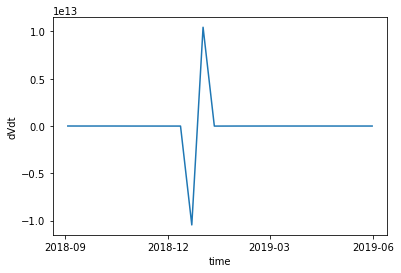

In [4]:
wmt_budget_terms.sel(time=slice('2018-09', '2019-05')).dVdt.sum('sigma2_bin').plot()

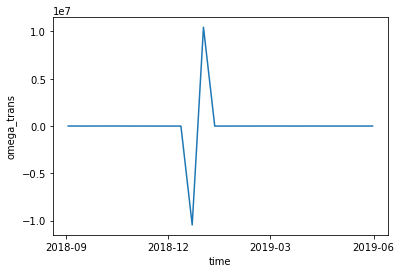

In [5]:
wmt_budget_terms.sel(time=slice('2018-09', '2019-05')).omega_trans.sum('sigma2_bin').plot()

In [6]:
#Converting time from Julian to datetime64[ns] object
datetimeindex = wmt_budget_terms.indexes['time'].to_datetimeindex()
wmt_budget_terms['time'] = datetimeindex

/tmp/ipykernel_329/3295612590.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = wmt_budget_terms.indexes['time'].to_datetimeindex()


In [7]:
wmt_budget_terms.load()

<xarray.Dataset>
Dimensions:         (time: 985, sigma2_bin: 699)
Coordinates:
  * sigma2_bin      (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03
  * time            (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T...
Data variables:
    dVdt            (time, sigma2_bin) float64 nan nan nan nan ... 0.0 0.0 0.0
    omega_trans     (time, sigma2_bin) float64 nan nan nan nan ... 0.0 0.0 0.0
    psi_vel         (time, sigma2_bin) float64 -1.351 -1.351 ... -0.0 -0.0
    u_binned_left   (time, sigma2_bin) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    u_binned_right  (time, sigma2_bin) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    v_binned        (time, sigma2_bin) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

## Time mean budgets

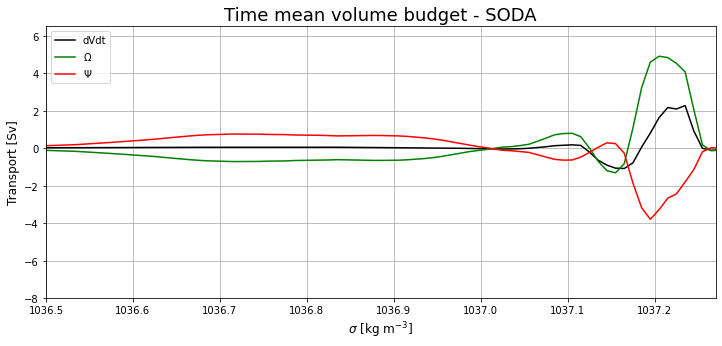

In [8]:
plt.figure(figsize=(12,5))
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dVdt', color='k')
wmt_budget_terms.omega_trans.mean(dim='time').plot(label=r'$\Omega$', color='green')
wmt_budget_terms.psi_vel.mean(dim='time').plot(label=r'$\Psi$', color='red')
plt.grid()
plt.legend()
plt.ylim(-8,6.5)
plt.xlim(1036.5, 1037.27)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
#plt.title(r'WMT volume budget in $\sigma$ space', fontsize=18);
plt.title('Time mean volume budget - SODA', fontsize=18);

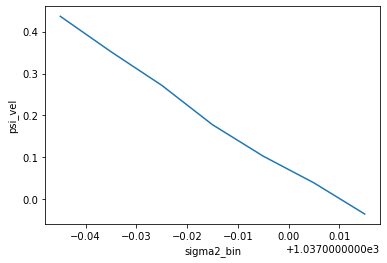

In [38]:
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1036.95, 1037.02)).plot()

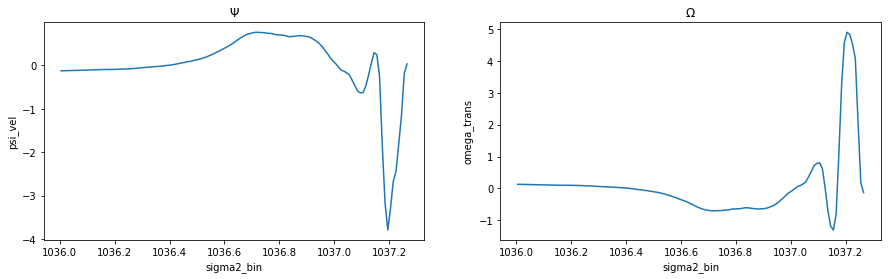

In [9]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4))
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1036.0, 1037.27)).plot(ax=ax0)
wmt_budget_terms.omega_trans.mean('time').sel(sigma2_bin=slice(1036.0, 1037.27)).plot(ax=ax1)
ax0.set_title(r'$\Psi$')
ax1.set_title(r'$\Omega$');

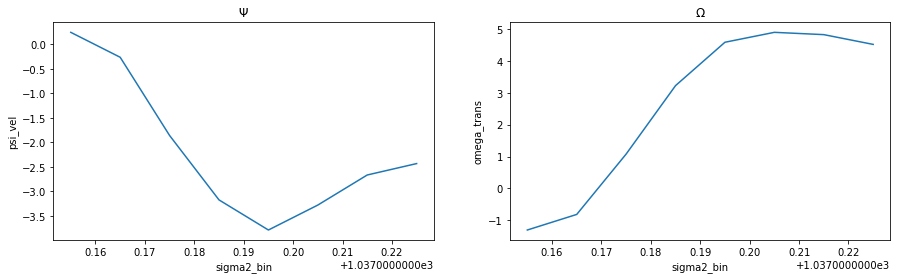

In [10]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4))
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1037.15, 1037.23)).plot(ax=ax0)
wmt_budget_terms.omega_trans.mean('time').sel(sigma2_bin=slice(1037.15, 1037.23)).plot(ax=ax1)
ax0.set_title(r'$\Psi$')
ax1.set_title(r'$\Omega$');

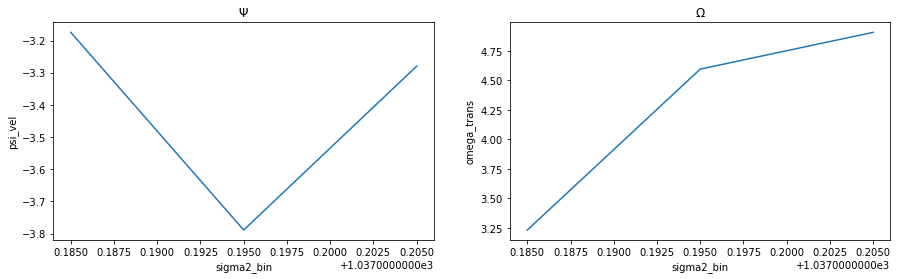

In [11]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4))
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1037.18, 1037.21)).plot(ax=ax0)
wmt_budget_terms.omega_trans.mean('time').sel(sigma2_bin=slice(1037.18, 1037.21)).plot(ax=ax1)
ax0.set_title(r'$\Psi$')
ax1.set_title(r'$\Omega$');

### $\frac{\partial V}{\partial t}$

In [39]:
bottom = (wmt_budget_terms.mean('time').isel(sigma2_bin=-1) - 
          wmt_budget_terms.mean('time').sel(sigma2_bin=1037.02, method='nearest'))
deep = (wmt_budget_terms.mean('time').sel(sigma2_bin=1037.02, method='nearest') - 
        wmt_budget_terms.mean('time').isel(sigma2_bin=0))

In [40]:
print('BOTTOM dvdt:', bottom.dVdt.values/1e6, ' psi:', bottom.psi_vel.values, ' omega:', bottom.omega_trans.values)

BOTTOM dvdt: 0.040849774748355015  psi: 0.11028837653191416  omega: -0.06017990028650937


In [41]:
print('DEEP dvdt:', deep.dVdt.values/1e6, ' psi:', deep.psi_vel.values, ' omega:', deep.omega_trans.values)

DEEP dvdt: -0.04084977474828792  psi: 0.02808685180386776  omega: -0.07696254647180376


In [45]:
bottom = -bottom
deep = -deep

In [52]:
print('BOTTOM correct dvdt:', bottom.dVdt.values/1e6, ' correct psi:', bottom.psi_vel.values, ' correct omega:', bottom.omega_trans.values)

BOTTOM correct dvdt: -0.040849774748355015  correct psi: -0.11028837653191416  correct omega: 0.06017990028650937


In [53]:
print('DEEP correct dvdt:', deep.dVdt.values/1e6, ' correct psi:', deep.psi_vel.values, ' correct omega:', deep.omega_trans.values)

DEEP correct dvdt: 0.04084977474828792  correct psi: -0.02808685180386776  correct omega: 0.07696254647180376


### $\Psi$

In [50]:
bottom.psi_vel + deep.psi_vel

<xarray.DataArray 'psi_vel' ()>
array(-0.13837523)

In [51]:
bottom.psi_vel

<xarray.DataArray 'psi_vel' ()>
array(-0.11028838)

### $\Omega$

In [19]:
- bottom.omega_trans - deep.omega_trans

<xarray.DataArray 'omega_trans' ()>
array(0.13714245)

In [20]:
- bottom.omega_trans

<xarray.DataArray 'omega_trans' ()>
array(4.59602478)

In [42]:
omega_bdy = wmt_budget_terms.omega_trans.sel(sigma2_bin=1037.195, method='nearest')

In [43]:
omega_bdy_mean = omega_bdy.mean('time').load()

In [44]:
omega_bdy_mean

<xarray.DataArray 'omega_trans' ()>
array(4.59602478)
Coordinates:
    sigma2_bin  float64 1.037e+03

### Budget

In [46]:
-(bottom.dVdt/1e6) + bottom.psi_vel + bottom.omega_trans

<xarray.DataArray ()>
array(-0.0092587)

In [48]:
deep.dVdt

<xarray.DataArray 'dVdt' ()>
array(40849.77474829)

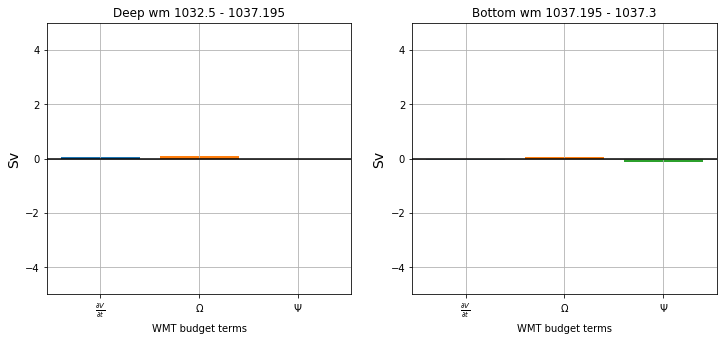

In [47]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.bar(x=r'$\frac{\partial V}{\partial t}$', height = deep.dVdt/1e6)
ax0.bar(x=r'$\Omega$', height = deep.omega_trans)
ax0.bar(x=r'$\Psi$', height= deep.psi_vel)
ax0.axhline(y=0, color='k')
ax0.set_title('Deep wm 1032.5 - 1037.195')
ax0.set_ylabel('Sv', fontsize=14)
ax0.set_xlabel('WMT budget terms')
ax0.grid()
ax0.set_ylim(-5,5)

ax1.bar(x=r'$\frac{\partial V}{\partial t}$', height = bottom.dVdt/1e6)
ax1.bar(x=r'$\Omega$', height = bottom.omega_trans)
ax1.bar(x=r'$\Psi$', height= bottom.psi_vel)
ax1.axhline(y=0, color='k')
ax1.set_title('Bottom wm 1037.195 - 1037.3')
ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('WMT budget terms')
ax1.grid()
ax1.set_ylim(-5,5);

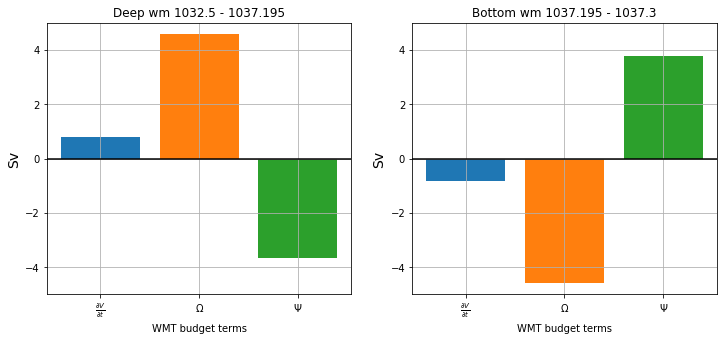

In [31]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.bar(x=r'$\frac{\partial V}{\partial t}$', height = deep.dVdt/1e6)
ax0.bar(x=r'$\Omega$', height = omega_bdy_mean)
ax0.bar(x=r'$\Psi$', height= deep.psi_vel)
ax0.axhline(y=0, color='k')
ax0.set_title('Deep wm 1032.5 - 1037.195')
ax0.set_ylabel('Sv', fontsize=14)
ax0.set_xlabel('WMT budget terms')
ax0.grid()
ax0.set_ylim(-5,5)

ax1.bar(x=r'$\frac{\partial V}{\partial t}$', height = bottom.dVdt/1e6)
ax1.bar(x=r'$\Omega$', height = - omega_bdy_mean)
ax1.bar(x=r'$\Psi$', height= bottom.psi_vel)
ax1.axhline(y=0, color='k')
ax1.set_title('Bottom wm 1037.195 - 1037.3')
ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('WMT budget terms')
ax1.grid()
ax1.set_ylim(-5,5);

> DEEP: Inflow, transformation is stronger and is making wm lose volume on avg. Net vol loss - not consistent with `wmt-budget-sigma-space-cleaned.ipynb`

> BOTTOM: Outflow not as strong as positive transformation adding volume to wm. Net vol gain - not consistent with `wmt-budget-sigma-space-cleaned.ipynb` which shows net loss

## Monthly Climatology

In [109]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    anom_chunk = anom.chunk({'time':-1, 'sigma2_bin':-1})
    anom_rolled = anom_chunk.rolling(time=36).mean(dim='time') #annual rolling mean to remove seasonal cycle
    return anom_rolled

In [110]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'),
                    wmt_budget_terms.psi_vel.rename('psi_vel'),
                    wmt_budget_terms.omega_trans.rename('omega_trans')])


In [79]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [80]:
clim_ds = anom_ds

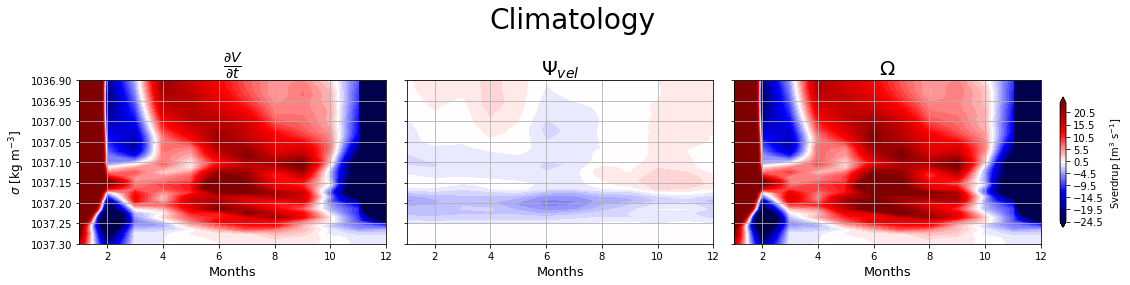

In [85]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(16, 4), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-25, 25) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax0.contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax0.set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax0.set_xlabel('Months', fontsize=13)
ax0.set_ylim(1037.3, 1036.9)
#ax[0,0].set_xlim(xmin='1993')
ax0.grid()

psi_vel_clim = clim(clim_ds.psi_vel)
c_psi = ax1.contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax1)
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax1.set_title(r'$\Psi_{vel}$', fontsize=20)
ax1.set_xlabel('Months', fontsize=13)
#ax1.set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax1.grid()

omega_clim = clim(clim_ds.omega_trans)
c_omega = ax2.contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax2)
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax2.set_title(r'$\Omega$', fontsize=20)
ax2.set_xlabel('Months', fontsize=13)
#ax2.set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax2.grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

### $\frac{\partial V}{\partial t}$

In [88]:
dVdt_clim_deep = dVdt_clim.sel(sigma2_bin=1037.195, method='nearest') - dVdt_clim.isel(sigma2_bin=0)
dVdt_clim_deep.load()

<xarray.DataArray 'dVdt' (month: 12)>
array([-119.22490583,  -22.46668299,   12.29306376,    3.2677585 ,
         16.90004538,   20.09433972,   14.84905936,   12.5270115 ,
         15.57204231,   -7.57148365,  -21.33960359,   85.07815553])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [89]:
dVdt_clim_bot = dVdt_clim.isel(sigma2_bin=-1) - dVdt_clim.sel(sigma2_bin=1037.195, method='nearest')
dVdt_clim_bot.load()

<xarray.DataArray 'dVdt' (month: 12)>
array([-121.23494194,   22.46668299,  -12.29306376,   -3.2677585 ,
        -16.90004538,  -20.09433972,  -14.84905936,  -12.52694787,
        -15.57210751,    7.57148365,   21.33960359,  161.24656657])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

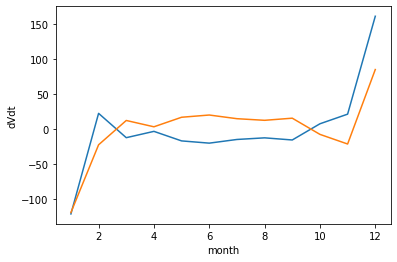

In [90]:
dVdt_clim_bot.plot()
dVdt_clim_deep.plot();

### $\Psi$

In [92]:
psi_clim_deep = psi_vel_clim.sel(sigma2_bin=1037.195, method='nearest') - psi_vel_clim.isel(sigma2_bin=0)
psi_clim_deep.load()

<xarray.DataArray 'psi_vel' (month: 12)>
array([-4.9219236 , -3.40615338, -2.32290949, -3.31910734, -4.18035511,
       -5.4827179 , -5.38816659, -4.14716827, -3.4522196 , -2.15204767,
       -1.88895202, -3.04381219])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [93]:
psi_clim_bot = psi_vel_clim.isel(sigma2_bin=-1) - psi_vel_clim.sel(sigma2_bin=1037.195, method='nearest')
psi_clim_bot.load()

<xarray.DataArray 'psi_vel' (month: 12)>
array([4.87219279, 3.69072803, 2.79941646, 3.11408629, 4.26214753,
       5.75866677, 5.54585712, 4.18160999, 3.75438602, 2.52352902,
       1.86221064, 3.01215867])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

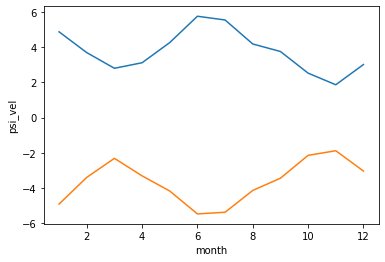

In [94]:
psi_clim_bot.plot()
psi_clim_deep.plot();

### $\Omega$

In [97]:
omega_clim_deep = omega_clim.sel(sigma2_bin=1037.195, method='nearest') - omega_clim.isel(sigma2_bin=0)
omega_clim_deep.load()

<xarray.DataArray 'omega_trans' (month: 12)>
array([-114.28132934,  -19.0605296 ,   14.61597325,    6.58686585,
         21.0804005 ,   25.57705762,   20.23722594,   16.67417977,
         19.02426191,   -5.41943598,  -19.45065157,   88.12196772])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [98]:
omega_clim_bot = omega_clim.isel(sigma2_bin=-1) - omega_clim.sel(sigma2_bin=1037.195, method='nearest')
omega_clim_bot.load()

<xarray.DataArray 'omega_trans' (month: 12)>
array([-126.1121071 ,   18.77595495,  -15.09248022,   -6.38184479,
        -21.16219291,  -25.85300648,  -20.39491647,  -16.70855786,
        -19.32649353,    5.04795462,   19.47739295,  158.23440791])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

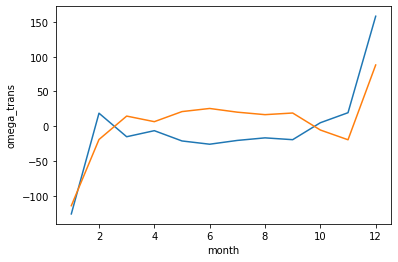

In [99]:
omega_clim_bot.plot()
omega_clim_deep.plot();

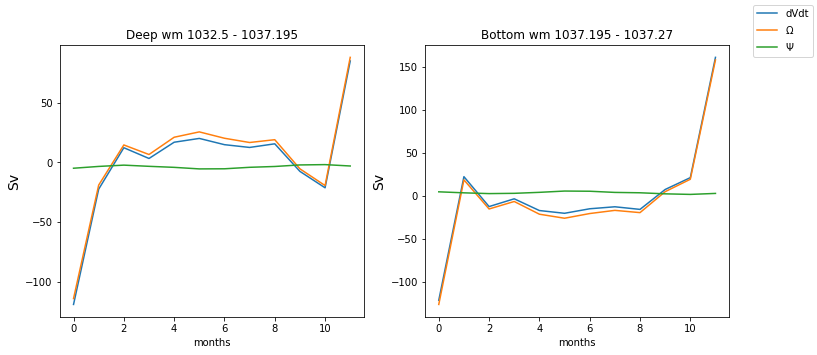

In [100]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.plot(dVdt_clim_deep, label='dVdt')
ax0.plot(omega_clim_deep, label=r'$\Omega$')
ax0.plot(psi_clim_deep, label=r'$\Psi$')

ax0.set_title('Deep wm 1032.5 - 1037.195')
ax0.set_ylabel('Sv', fontsize=14)
ax0.set_xlabel('months')

ax1.plot(dVdt_clim_bot)#, label='dVdt')
ax1.plot(omega_clim_bot)#, label=r'$\Omega$')
ax1.plot(psi_clim_bot)#, label=r'$\Psi$')
ax1.set_title('Bottom wm 1037.195 - 1037.27')
ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('months')

fig.legend();

## Anomaly

In [114]:
anom = anom(anom_ds)

In [115]:
year_start_index = [0, 36, 73, 109, 146, 182, 219, 255, 292, 329, 
                    365, 402, 438, 475, 511, 548, 584, 621, 657, 
                    694, 730, 767, 803, 840, 876, 913, 949]

In [116]:
import warnings
warnings.filterwarnings("ignore")

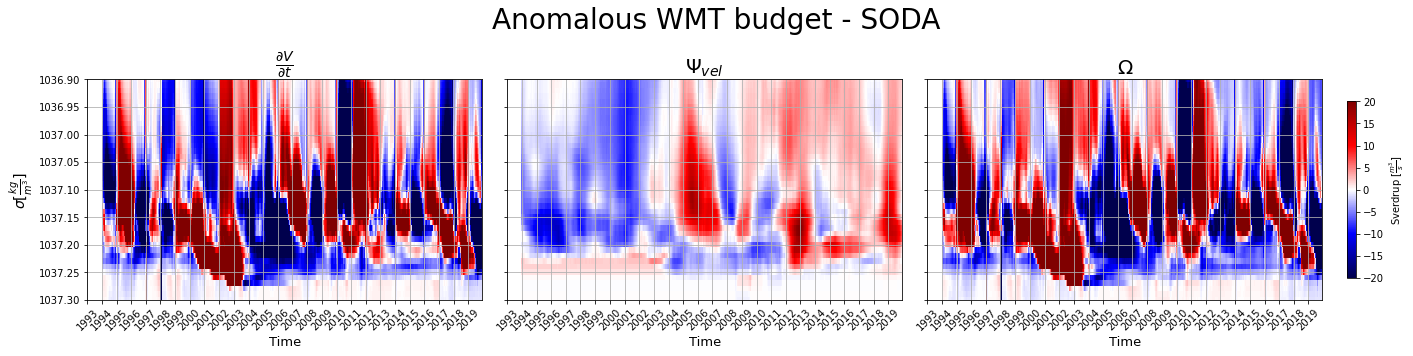

In [117]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 5), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

#ax00 = ax0.twinx()
#ax10 = ax1.twinx()
#ax20 = ax2.twinx()

dVdt_anom_rolled = anom.dVdt/1e6
c = ax0.pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-20, vmax=20, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax0)
ax0.set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax0.set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax0.set_ylim(1037.3, 1036.9)
ax0.set_xticks(dVdt_anom_rolled.time.values[year_start_index])
ax0.set_xticklabels(ax0.get_xticks(), rotation = 45)
ax0.set_xticklabels([str(i) for i in np.arange(1993, 2020)], rotation = 45)
ax0.set_xlabel('Time', fontsize=13)
#ax00.plot(sam.time.isel(index=slice(49, 54)), sam.ANN.isel(index=slice(49, 54)))
#ax00.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax0.grid()

psi_vel_anom_rolled = anom.psi_vel
c_psi = ax1.pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-20, vmax=20, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax1)
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax1.set_title(r'$\Psi_{vel}$', fontsize=20)
#ax1.set_ylim(1037.3, 1036.5)
ax1.set_xticks(psi_vel_anom_rolled.time.values[year_start_index])
ax1.set_xticklabels([str(i) for i in np.arange(1993, 2020)], rotation = 45)
ax1.set_xlabel('Time', fontsize=13)
#ax10.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax1.grid()

omega_anom_rolled = anom.omega_trans
c_omega = ax2.pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-20, vmax=20, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax2)
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax2.set_title(r'$\Omega$', fontsize=20)
#ax2.set_ylim(1037.3, 1036.5)
ax2.set_xticks(omega_anom_rolled.time.values[year_start_index])
ax2.set_xticklabels([str(i) for i in np.arange(1993, 2020)], rotation = 45)
ax2.set_xlabel('Time', fontsize=13)
#ax20.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax2.grid()

plt.suptitle('Anomalous WMT budget - SODA', fontsize=28)
plt.tight_layout();

### $\frac{\partial V}{\partial t}$

In [118]:
dVdt_anom_deep = anom.dVdt.sel(sigma2_bin=1037.195, method='nearest') - anom.dVdt.isel(sigma2_bin=0)
dVdt_anom_deep.load()

<xarray.DataArray 'dVdt' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
       -9.86158730e+06, -9.35359230e+06, -8.61141159e+06, -7.41426722e+06,
       -5.71171444e+06, -4.15505322e+06, -2.61057568e+06, -9.56082556e+05,
        6.35618420e+05,  1.56661059e+06,  2.29106323e+06,  2.26374160e+06,
        2.36757292e+06,  2.56604433e+06,  2.56086731e+06,  2.57379571e+06,
        2.61141000e+06,  2.34087840e+06,  1.61332615e+06,  1.25183600e+06,
        4.76312844e+05, -2.45570651e+04, -7.76859478e+05, -1.53439558e+06,
       -1.88094769e+06, -2.57836821e+06, -3.18501272e+06, -3.95358749e+06,
       -1.52482732e+06,  7.65381939e+05,  1.65091502e+06,  2.45676623e+06,
        1.93178624e+06,  3.97996465e+06,  3.36503230e+06,  3.08120641e+06,
       -2.87162375e+06, -2.98919126e+06, -2.76326539e+06, -4.51623519e+05,
       -5.25991554e+05,  7.62685242e+05,  3.21083315e+06,  3.58719764e+06,
...
        4.59184876e+07,  4.78757174e+07,  4.69648485e+07,  4.68326507e+07,
        1.65901544e+07,  1.53843122e+07,  1.62853908e+07,  1.67876549e+07,
        1.69832634e+07,  1.64230205e+07,  1.48170576e+07,  1.28453898e+07,
        9.06220330e+06,  9.71710655e+06,  6.51550008e+06,  1.35028806e+06,
       -1.22528028e+06, -3.25768729e+06, -3.41842400e+06,  1.98823462e+06,
        9.33360958e+06,  1.47845269e+07,  1.82774425e+07,  2.34050979e+07,
        3.29665516e+07,  3.63776986e+07,  3.67354149e+07,  3.74597789e+07,
        3.76506407e+07,  3.79109451e+07,  3.68274874e+07,  3.56827274e+07,
        3.61619186e+07,  3.61149811e+07,  3.45591894e+07,  3.27213946e+07,
        2.87803303e+07,  2.19885124e+07,  1.92566075e+07,  1.75616308e+07,
        2.92582567e+08,  3.11830512e+07,  2.07770951e+07,  1.93046483e+07,
        1.99959282e+07,  1.86775369e+07,  1.80308026e+07,  1.36514081e+07,
        1.02042308e+07,  5.29974539e+06,  2.25621613e+06,  3.43672185e+06,
        1.97273710e+06, -1.36461090e+06, -5.06183012e+06, -1.34435635e+07,
       -2.29342701e+07, -3.00841368e+07, -3.49188582e+07, -4.05024105e+07,
       -5.05233940e+07, -5.39073685e+07, -5.48776028e+07, -5.62491797e+07,
       -5.73911475e+07, -5.78773571e+07, -5.71395098e+07, -5.57760059e+07,
       -5.57318349e+07, -5.53425677e+07, -5.40794000e+07, -5.64512487e+07,
       -5.57505930e+07, -5.03224007e+07, -4.48435777e+07, -4.32926979e+07,
       -2.92266094e+08])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

In [119]:
dVdt_anom_bot = anom.dVdt.isel(sigma2_bin=-1) - anom.dVdt.sel(sigma2_bin=1037.195, method='nearest')
dVdt_anom_bot.load()

<xarray.DataArray 'dVdt' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        9.37284790e+06,  8.86485291e+06,  8.12267219e+06,  6.92552782e+06,
        5.22297504e+06,  3.66631382e+06,  2.12183628e+06,  4.67343159e+05,
       -1.12435782e+06, -2.05534999e+06, -2.77980262e+06, -2.75248100e+06,
       -2.85631232e+06, -3.05478372e+06, -3.04960670e+06, -3.06253510e+06,
       -3.10014940e+06, -2.82961780e+06, -2.10206555e+06, -1.74057540e+06,
       -9.65052241e+05, -4.64180564e+05,  2.88121849e+05,  1.04565795e+06,
        1.39220649e+06,  2.08962701e+06,  2.69627151e+06,  3.46484809e+06,
        1.03608793e+06, -1.25412134e+06, -2.13965441e+06, -2.94550563e+06,
       -2.42052564e+06,  2.37364934e+06,  2.98858170e+06,  3.27240758e+06,
       -4.29655586e+06, -4.17898835e+06, -4.40491422e+06, -3.71158776e+04,
        3.72521567e+04, -1.25142464e+06, -3.69957254e+06, -4.07593704e+06,
...
       -3.97277868e+07, -3.48426631e+07, -3.39317943e+07, -3.37995965e+07,
       -1.70788938e+07, -1.58730516e+07, -1.67741302e+07, -1.72763943e+07,
       -1.74720028e+07, -1.69117599e+07, -1.53057970e+07, -1.33341292e+07,
       -9.55094270e+06, -1.02058459e+07, -7.00423948e+06, -1.83902745e+06,
        7.36540879e+05,  2.76894789e+06,  2.92968461e+06, -2.47697402e+06,
       -9.82234898e+06, -1.52732663e+07, -1.87661819e+07, -2.38938373e+07,
       -3.34552910e+07, -3.68664380e+07, -3.72241543e+07, -3.79485183e+07,
       -3.81393801e+07, -3.83996845e+07, -3.73162268e+07, -3.61714668e+07,
       -3.66506580e+07, -3.66037205e+07, -3.50479288e+07, -3.32101340e+07,
       -2.92690697e+07, -2.24772518e+07, -1.97453469e+07, -1.80503702e+07,
        2.68001672e+08, -3.16717906e+07, -2.12658345e+07, -1.97933877e+07,
       -1.38052274e+07, -1.24868361e+07, -1.18401018e+07, -7.46070732e+06,
       -4.01353000e+06,  8.90955431e+05,  3.93448469e+06,  2.75397896e+06,
        4.21796372e+06,  7.55531172e+06,  1.12525309e+07,  1.96342643e+07,
        2.91249709e+07,  3.62748377e+07,  4.11095591e+07,  4.66931114e+07,
        5.67140949e+07,  6.00980693e+07,  6.10683054e+07,  6.24398823e+07,
        6.35818501e+07,  6.40680561e+07,  6.33302088e+07,  6.19667049e+07,
        6.19225357e+07,  6.15332685e+07,  6.02701008e+07,  6.26419495e+07,
        6.19412939e+07,  5.65131015e+07,  5.78766319e+07,  5.63257521e+07,
       -2.55773830e+08])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

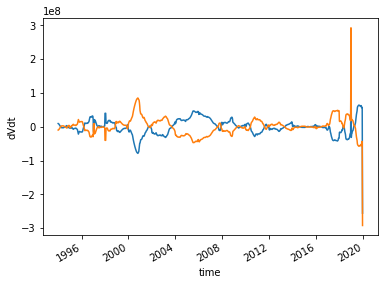

In [120]:
dVdt_anom_bot.plot()
dVdt_anom_deep.plot();

### $\Psi$

In [121]:
psi_anom_deep = anom.psi_vel.sel(sigma2_bin=1037.195, method='nearest') - anom.psi_vel.isel(sigma2_bin=0)
psi_anom_deep.load()

<xarray.DataArray 'psi_vel' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -1.00855276e+00,
       -1.05016428e+00, -9.26162739e-01, -8.23501980e-01, -7.21359725e-01,
       -8.67289322e-01, -9.36455859e-01, -8.87564302e-01, -9.55237012e-01,
       -9.36774074e-01, -1.02599588e+00, -1.08856279e+00, -1.25580438e+00,
       -1.28830940e+00, -1.28703481e+00, -1.37295534e+00, -1.43437243e+00,
       -1.57808900e+00, -1.92582523e+00, -2.20588505e+00, -2.61736345e+00,
       -3.22767936e+00, -3.42382085e+00, -3.58915671e+00, -3.59953508e+00,
       -3.71869896e+00, -3.77275221e+00, -3.99421058e+00, -4.24355665e+00,
       -4.33947500e+00, -4.57019212e+00, -4.93223600e+00, -5.18069505e+00,
       -5.52077484e+00, -5.80245947e+00, -6.16921697e+00, -6.25847907e+00,
       -6.47148755e+00, -6.62387184e+00, -6.78139420e+00, -6.93055098e+00,
       -7.11011688e+00, -7.17418262e+00, -7.34368846e+00, -7.54274020e+00,
...
        1.78323712e+00,  1.79294101e+00,  1.79287651e+00,  2.03172587e+00,
        2.05440215e+00,  2.16888751e+00,  2.23676250e+00,  2.11994173e+00,
        1.91090303e+00,  1.85497042e+00,  1.76394165e+00,  1.88845298e+00,
        1.94565304e+00,  1.89316265e+00,  1.86548804e+00,  1.92200340e+00,
        2.11832958e+00,  2.30534875e+00,  2.34466601e+00,  2.26290545e+00,
        2.34014724e+00,  2.26504331e+00,  2.03405114e+00,  2.09422462e+00,
        2.55246928e+00,  2.73696654e+00,  2.96406564e+00,  2.86260499e+00,
        3.04647134e+00,  3.50962170e+00,  3.81754056e+00,  3.82933371e+00,
        4.07809249e+00,  4.37591559e+00,  5.13024548e+00,  5.72556594e+00,
        6.32034635e+00,  6.91281584e+00,  7.41591775e+00,  7.41810834e+00,
        7.50936153e+00,  7.67648851e+00,  7.94263606e+00,  8.36618829e+00,
        8.74210508e+00,  8.93044207e+00,  9.06156281e+00,  9.08548032e+00,
        9.14945958e+00,  8.96228785e+00,  9.16648735e+00,  9.13530437e+00,
        9.08281619e+00,  9.04173025e+00,  9.13211456e+00,  9.26888508e+00,
        9.31764207e+00,  9.49163312e+00,  9.59846451e+00,  9.46340129e+00,
        9.01488980e+00,  8.67945391e+00,  8.40045861e+00,  8.32260413e+00,
        7.96250019e+00,  7.31373435e+00,  6.81310481e+00,  6.68596967e+00,
        6.55841725e+00,  6.33389915e+00,  5.72124975e+00,  5.02958408e+00,
        4.61475246e+00,  3.96503976e+00,  3.42208728e+00,  3.32153933e+00,
        3.24764132e+00])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

In [122]:
psi_anom_bot = anom.psi_vel.isel(sigma2_bin=-1) - anom.psi_vel.sel(sigma2_bin=1037.195, method='nearest')
psi_anom_bot.load()

<xarray.DataArray 'psi_vel' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,  1.04573899e+00,
        1.02973206e+00,  8.98646347e-01,  8.40502922e-01,  7.99845246e-01,
        9.42519797e-01,  1.07916013e+00,  1.03025329e+00,  1.07669680e+00,
        1.05985084e+00,  1.10768442e+00,  1.11262052e+00,  1.22150550e+00,
        1.27718820e+00,  1.26295651e+00,  1.35710115e+00,  1.40844640e+00,
        1.52867377e+00,  1.91831446e+00,  2.25506580e+00,  2.66508493e+00,
        3.30824504e+00,  3.53282480e+00,  3.78394320e+00,  3.80720915e+00,
        3.91884798e+00,  3.92472896e+00,  4.10387315e+00,  4.31299517e+00,
        4.37037986e+00,  4.58786305e+00,  4.92668612e+00,  5.16771198e+00,
        5.49483568e+00,  5.82439304e+00,  6.27314182e+00,  6.41916080e+00,
        6.64972316e+00,  6.80580659e+00,  6.90791093e+00,  7.02862027e+00,
        7.20042123e+00,  7.31787413e+00,  7.53592016e+00,  7.75462565e+00,
...
       -2.38036022e+00, -2.37475632e+00, -2.34026837e+00, -2.50495064e+00,
       -2.41537500e+00, -2.37923312e+00, -2.35208333e+00, -2.24249674e+00,
       -2.09589113e+00, -2.04249713e+00, -1.97750234e+00, -2.08861981e+00,
       -2.12270878e+00, -2.10560967e+00, -2.08789330e+00, -2.09249402e+00,
       -2.21523373e+00, -2.33406903e+00, -2.35862143e+00, -2.22571501e+00,
       -2.22312021e+00, -2.09485714e+00, -1.87620648e+00, -1.98538936e+00,
       -2.39411056e+00, -2.59542817e+00, -2.78694429e+00, -2.67239330e+00,
       -2.86936150e+00, -3.33845146e+00, -3.67668940e+00, -3.71567806e+00,
       -3.96929448e+00, -4.17007385e+00, -4.84710479e+00, -5.30719384e+00,
       -5.85106608e+00, -6.40655243e+00, -6.92814456e+00, -7.00912199e+00,
       -7.13536941e+00, -7.42834350e+00, -7.71980239e+00, -8.10926452e+00,
       -8.39495275e+00, -8.57455020e+00, -8.69341050e+00, -8.79089675e+00,
       -8.91690865e+00, -8.72705951e+00, -8.91315739e+00, -8.93842691e+00,
       -8.95837250e+00, -8.94997739e+00, -9.01841327e+00, -9.18271543e+00,
       -9.27812170e+00, -9.36640308e+00, -9.44725236e+00, -9.38125851e+00,
       -9.03336886e+00, -8.73973156e+00, -8.51586104e+00, -8.48290867e+00,
       -8.13139016e+00, -7.49914116e+00, -7.01239235e+00, -6.92025736e+00,
       -6.76463064e+00, -6.56845989e+00, -6.02454023e+00, -5.47441177e+00,
       -5.07158778e+00, -4.46254462e+00, -3.90460113e+00, -3.75844182e+00,
       -3.67386768e+00])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

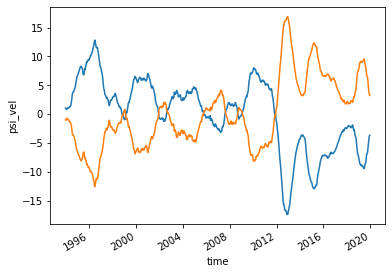

In [123]:
psi_anom_bot.plot()
psi_anom_deep.plot();

### $\Omega$

In [124]:
omega_anom_deep = anom.omega_trans.sel(sigma2_bin=1037.195, method='nearest') - anom.omega_trans.isel(sigma2_bin=0)
omega_anom_deep.load()

<xarray.DataArray 'omega_trans' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
       -8.81322742e+00, -8.42923397e+00, -7.78971401e+00, -6.69471190e+00,
       -4.84622952e+00, -3.22040176e+00, -1.72481578e+00, -2.64995174e-03,
        1.57058809e+00,  2.59080206e+00,  3.37782161e+00,  3.51774157e+00,
        3.65407792e+00,  3.85127472e+00,  3.93201824e+00,  4.00636373e+00,
        4.18769459e+00,  4.26489922e+00,  3.81740679e+00,  3.86739505e+00,
        3.70218779e+00,  3.39745938e+00,  2.81049283e+00,  2.06333509e+00,
        1.83594686e+00,  1.19257959e+00,  8.07393448e-01,  2.88164754e-01,
        2.81284327e+00,  5.33376966e+00,  6.58134662e+00,  7.63565687e+00,
        7.45075667e+00,  9.78061972e+00,  9.53244486e+00,  9.33788107e+00,
        3.59866087e+00,  3.63347764e+00,  4.01692587e+00,  6.47712306e+00,
        6.58232092e+00,  7.93506345e+00,  1.05527172e+01,  1.11281334e+01,
...
        4.41328446e+01,  4.60803705e+01,  4.51695661e+01,  4.47985190e+01,
        1.45339479e+01,  1.32136202e+01,  1.40468238e+01,  1.46659088e+01,
        1.50705559e+01,  1.45662457e+01,  1.30513116e+01,  1.09551324e+01,
        7.11474586e+00,  7.82213950e+00,  4.64820763e+00, -5.73519751e-01,
       -3.34541426e+00, -5.56484044e+00, -5.76489443e+00, -2.76475236e-01,
        6.99165793e+00,  1.25176791e+01,  1.62415870e+01,  2.13090689e+01,
        3.04122779e+01,  3.36389277e+01,  3.37695449e+01,  3.45953695e+01,
        3.46023649e+01,  3.43995190e+01,  3.30081425e+01,  3.18515893e+01,
        3.20820217e+01,  3.17372611e+01,  2.94271396e+01,  2.69940243e+01,
        2.24581796e+01,  1.50738921e+01,  1.18388854e+01,  1.01417181e+01,
        2.85071401e+02,  2.35047583e+01,  1.28326546e+01,  1.09366556e+01,
        1.12514172e+01,  9.74468893e+00,  8.96683393e+00,  4.56352195e+00,
        1.05236536e+00, -3.66494834e+00, -6.91267710e+00, -5.70098839e+00,
       -7.11248496e+00, -1.04087470e+01, -1.41963506e+01, -2.27148544e+01,
       -3.22543181e+01, -3.95781758e+01, -4.45197286e+01, -4.99682177e+01,
       -5.95406897e+01, -6.25892283e+01, -6.32804673e+01, -6.45741897e+01,
       -6.53560536e+01, -6.51934974e+01, -6.39550205e+01, -6.24643814e+01,
       -6.22926580e+01, -6.16788727e+01, -5.98030556e+01, -6.14832386e+01,
       -6.03677514e+01, -5.42898463e+01, -4.82680708e+01, -4.66166431e+01,
       -2.95516141e+02])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

In [125]:
omega_anom_bot = anom.omega_trans.isel(sigma2_bin=-1) - anom.omega_trans.sel(sigma2_bin=1037.195, method='nearest')
omega_anom_bot.load()

<xarray.DataArray 'omega_trans' (time: 985)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        8.34353020e+00,  7.96662092e+00,  7.28258363e+00,  6.12609694e+00,
        4.28086961e+00,  2.58756805e+00,  1.09199736e+00, -6.08939272e-01,
       -2.18379430e+00, -3.16262004e+00, -3.89200878e+00, -3.97357213e+00,
       -4.13308615e+00, -4.31732587e+00, -4.40629349e+00, -4.47056714e+00,
       -4.62840880e+00, -4.74751789e+00, -4.35671699e+00, -4.40524597e+00,
       -4.27288292e+00, -3.99659100e+00, -3.49540699e+00, -2.76113683e+00,
       -2.52622713e+00, -1.83468759e+00, -1.40718727e+00, -8.47732718e-01,
       -3.33387757e+00, -5.84157002e+00, -7.06592617e+00, -8.11280324e+00,
       -7.91494695e+00, -3.45032933e+00, -3.28414576e+00, -3.14633886e+00,
       -1.09460028e+01, -1.09845187e+01, -1.13125489e+01, -7.06532179e+00,
       -7.16275471e+00, -8.56888441e+00, -1.12350783e+01, -1.18301483e+01,
...
       -3.73468741e+01, -3.24673543e+01, -3.15909734e+01, -3.12940934e+01,
       -1.46631045e+01, -1.34934041e+01, -1.44216325e+01, -1.50334832e+01,
       -1.53756973e+01, -1.48688485e+01, -1.33278803e+01, -1.12450951e+01,
       -7.42781955e+00, -8.09982191e+00, -4.91593181e+00,  2.53880934e-01,
        2.95218897e+00,  5.10343129e+00,  5.28872040e+00, -2.50844648e-01,
       -7.59881440e+00, -1.31779948e+01, -1.68895611e+01, -2.19080336e+01,
       -3.10607661e+01, -3.42705955e+01, -3.44367956e+01, -3.52757106e+01,
       -3.52696042e+01, -3.50608187e+01, -3.36391231e+01, -3.24553744e+01,
       -3.26809491e+01, -3.24332323e+01, -3.02004097e+01, -2.79025258e+01,
       -2.34175893e+01, -1.60702850e+01, -1.28167880e+01, -1.10408338e+01,
        2.75137455e+02, -2.42430327e+01, -1.35456177e+01, -1.16837088e+01,
       -5.40972215e+00, -3.91173338e+00, -3.14613881e+00,  1.33074192e+00,
        4.90393114e+00,  9.61856742e+00,  1.28481946e+01,  1.16929584e+01,
        1.31768887e+01,  1.65058416e+01,  2.02714967e+01,  2.88175322e+01,
        3.84036451e+01,  4.56417932e+01,  5.05573639e+01,  5.60749224e+01,
        6.57480162e+01,  6.88383534e+01,  6.95847189e+01,  7.09233435e+01,
        7.17137928e+01,  7.15677498e+01,  7.03431536e+01,  6.88875147e+01,
        6.86877188e+01,  6.81022809e+01,  6.62951935e+01,  6.81169137e+01,
        6.70134341e+01,  6.09761986e+01,  6.17817855e+01,  6.00847464e+01,
       -2.52099410e+02])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

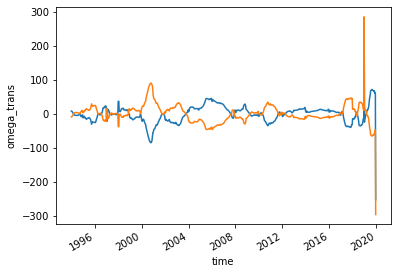

In [126]:
omega_anom_bot.plot()
omega_anom_deep.plot();

In [127]:
omega_anom_bot.time

<xarray.DataArray 'time' (time: 985)>
array(['1993-01-07T01:00:00.000000000', '1993-01-17T01:00:00.000000000',
       '1993-01-27T01:00:00.000000000', ..., '2019-11-27T01:00:00.000000000',
       '2019-12-07T01:00:00.000000000', '2019-12-17T01:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T01:00:00
    month    (time) int64 1 1 1 2 2 2 3 3 3 4 4 ... 9 9 10 10 10 11 11 11 12 12

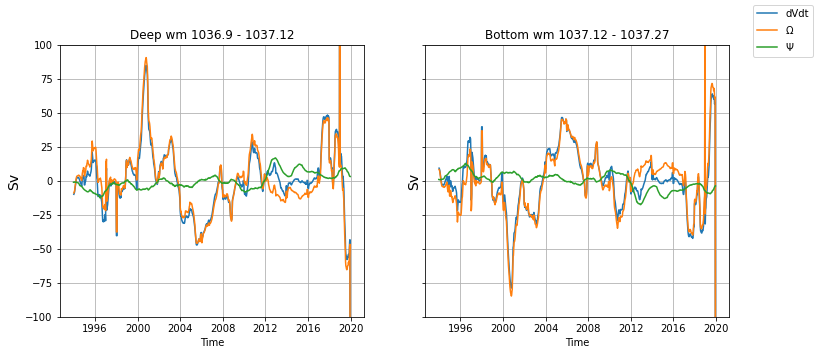

In [129]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5), sharey=True)

ax0.plot(anom.time, dVdt_anom_deep/1e6, label='dVdt')
ax0.plot(anom.time, omega_anom_deep, label=r'$\Omega$')
ax0.plot(anom.time, psi_anom_deep, label=r'$\Psi$')

ax0.set_title('Deep wm 1036.9 - 1037.12')
ax0.set_ylim(-100,100)
ax0.set_ylabel('Sv', fontsize=14)
ax0.set_xlabel('Time')
ax0.grid()

ax1.plot(anom.time, dVdt_anom_bot/1e6)#, label='dVdt')
ax1.plot(anom.time, omega_anom_bot)#, label=r'$\Omega$')
ax1.plot(anom.time, psi_anom_bot)#, label=r'$\Psi$')
ax1.set_title('Bottom wm 1037.12 - 1037.27')
ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('Time')
ax1.grid()

fig.legend();